# Data Visualization - Distribution

## Goal
- Memperkenalkan cara untuk memvisualisasikan persebaran (distribution) data dengan python.

## Referensi
- https://www.tapclicks.com/blog/data-visualization-types

In [1]:
from matplotlib.patches import Patch
from pypalettes import load_cmap
from wordcloud import WordCloud
from vega_datasets import data as data_vega
from PIL import Image

import altair as alt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import re
import seaborn as sns
import squarify

pyo.init_notebook_mode(connected=True)

%matplotlib inline

/Users/indraputramr/Library/Python/3.9/lib/python/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/indraputramr/Library/Python/3.9/lib/python/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 1. Distribution - One Variable

Text(0.5, 1.0, "Distribution of Penguin's Bill Length")

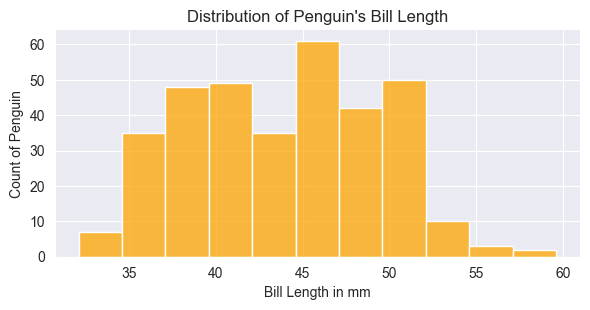

In [3]:
sns.set_style('darkgrid')
sns.displot(
    data=df,
    x='bill_length_mm',
    height=3,
    aspect=2,
    color='orange'
)
plt.xlabel('Bill Length in mm')
plt.ylabel('Count of Penguin')
plt.title("Distribution of Penguin's Bill Length")

Text(0.5, 1.0, "Distribution of Penguin's Bill Length")

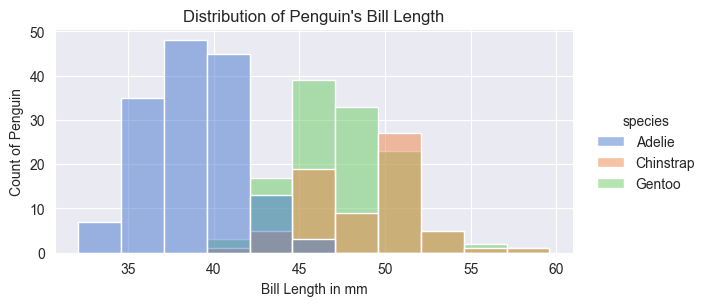

In [4]:
sns.set_style('darkgrid')
sns.displot(
    data=df,
    x='bill_length_mm',
    height=3,
    aspect=2,
    hue='species',
    palette='muted'
)
plt.xlabel('Bill Length in mm')
plt.ylabel('Count of Penguin')
plt.title("Distribution of Penguin's Bill Length")

Text(0.5, 1.0, "Distribution of Penguin's Bill Length")

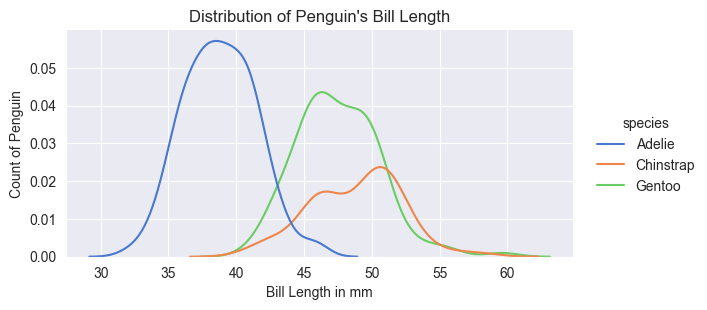

In [5]:
sns.set_style('darkgrid')
sns.displot(
    data=df,
    x='bill_length_mm',
    kind='kde',
    height=3,
    aspect=2,
    hue='species',
    palette='muted'
)
plt.xlabel('Bill Length in mm')
plt.ylabel('Count of Penguin')
plt.title("Distribution of Penguin's Bill Length")

In [6]:
df_t = pd.read_csv('../data/titanic.csv')
df_t['Pclass'] = df_t['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})

<Axes: xlabel='Age'>

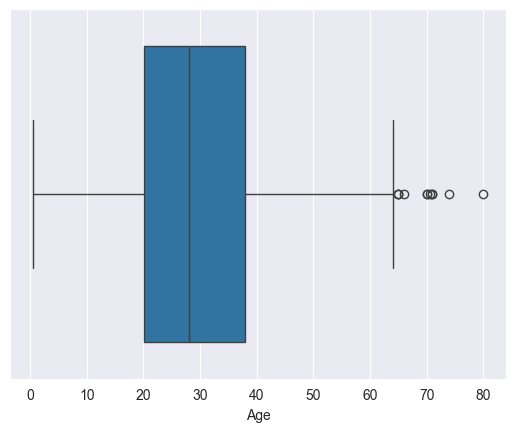

In [7]:
sns.boxplot(x=df_t['Age'])

<Axes: xlabel='Age', ylabel='Pclass'>

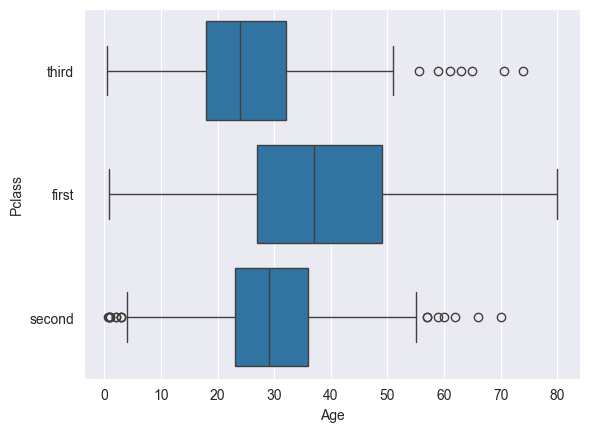

In [8]:
sns.boxplot(data=df_t, x='Age', y='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

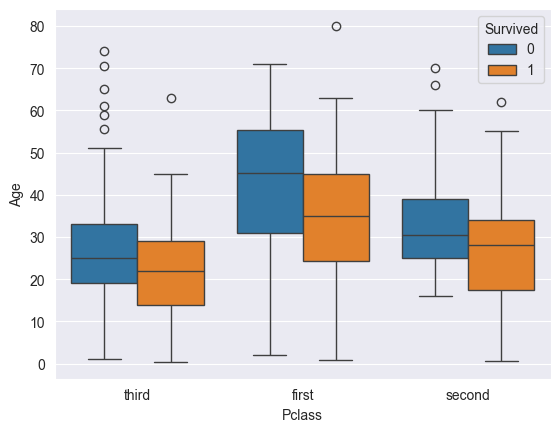

In [9]:
sns.boxplot(data=df_t, x="Pclass", y="Age", hue="Survived")

### 2. Distribution - More Then One Variable

Text(0.5, 1.0, "Distribution of Penguin's Bill & Flipper")

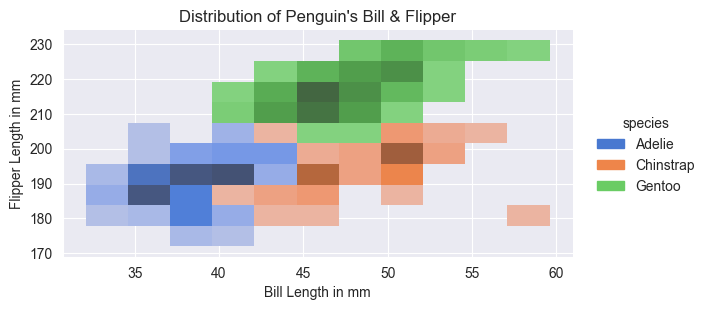

In [10]:
sns.set_style('darkgrid')
sns.displot(
    data=df,
    x='bill_length_mm',
    y='flipper_length_mm',
    height=3,
    aspect=2,
    hue='species',
    palette='muted'
)
plt.xlabel('Bill Length in mm')
plt.ylabel('Flipper Length in mm')
plt.title("Distribution of Penguin's Bill & Flipper")

Text(0.5, 1.0, "Distribution of Penguin's Bill & Flipper")

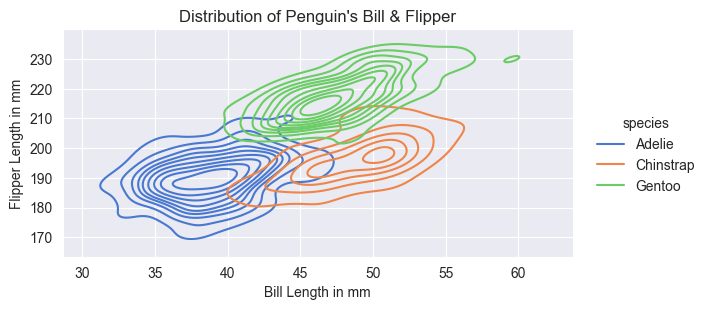

In [11]:
sns.set_style('darkgrid')
sns.displot(
    data=df,
    x='bill_length_mm',
    y='flipper_length_mm',
    kind='kde',
    height=3,
    aspect=2,
    hue='species',
    palette='muted'
)
plt.xlabel('Bill Length in mm')
plt.ylabel('Flipper Length in mm')
plt.title("Distribution of Penguin's Bill & Flipper")

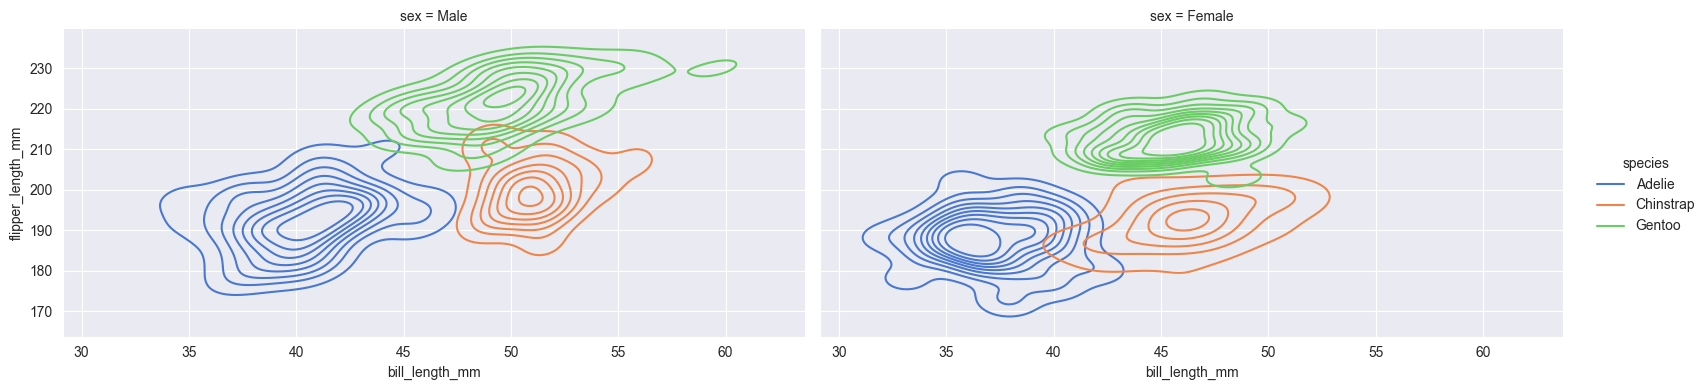

In [12]:
sns.set_style('darkgrid')
sns.displot(
    data=df,
    x='bill_length_mm',
    y='flipper_length_mm',
    kind='kde',
    height=4,
    aspect=2,
    hue='species',
    palette='muted',
    col="sex"
)

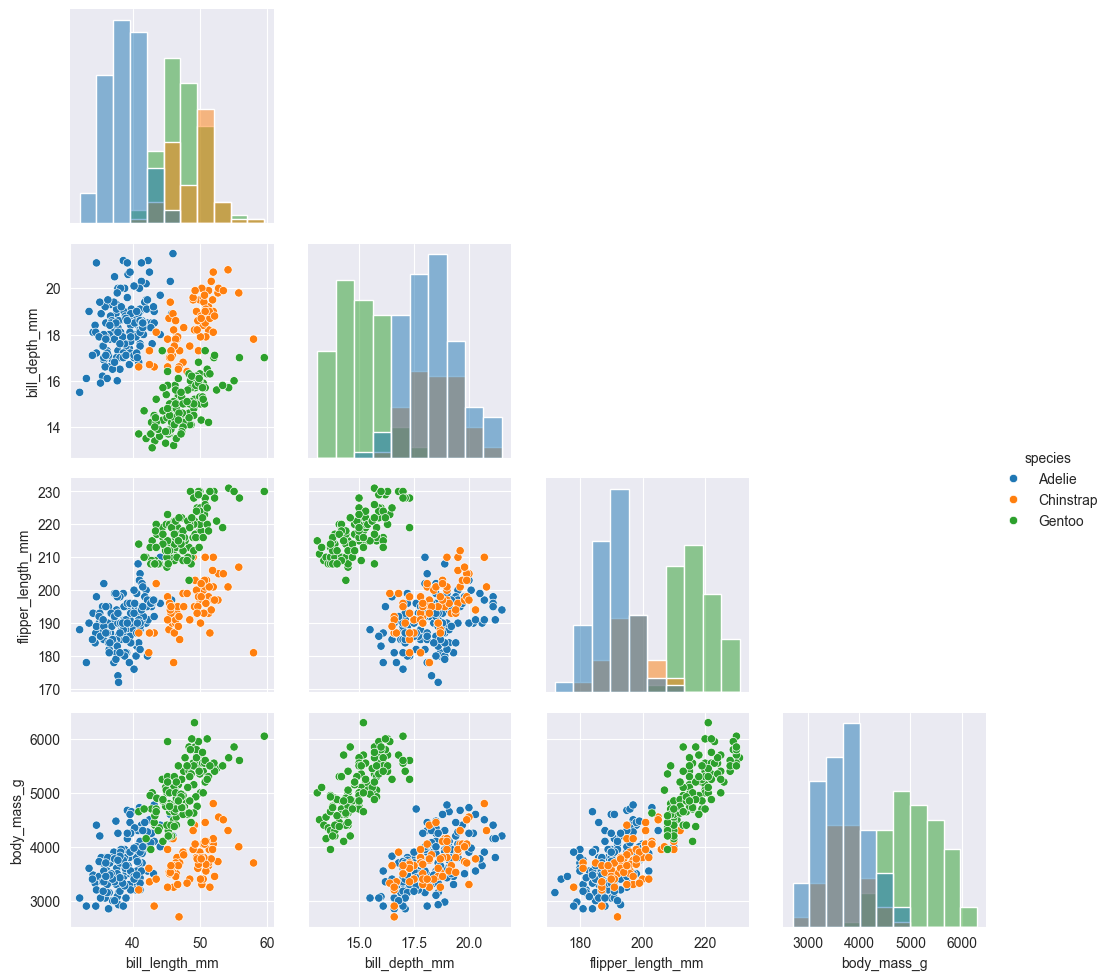

In [13]:
g = sns.PairGrid(df, hue="species", diag_sharey=False, corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### 3. Additional

#### 3.1 WordCloud

In [20]:
df = pd.read_csv('../data/titanic.csv')

In [21]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['Name']

0                                Braund Mr Owen Harris
1      Cumings Mrs John Bradley Florence Briggs Thayer
2                                 Heikkinen Miss Laina
3             Futrelle Mrs Jacques Heath Lily May Peel
4                               Allen Mr William Henry
                            ...                       
886                                Montvila Rev Juozas
887                         Graham Miss Margaret Edith
888               Johnston Miss Catherine Helen Carrie
889                                Behr Mr Karl Howell
890                                  Dooley Mr Patrick
Name: Name, Length: 891, dtype: object

In [23]:
text = ' '.join(df['Name'].tolist())

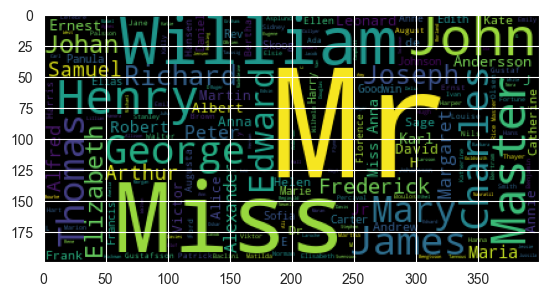

In [24]:
wc = WordCloud().generate(text)
plt.imshow(wc)

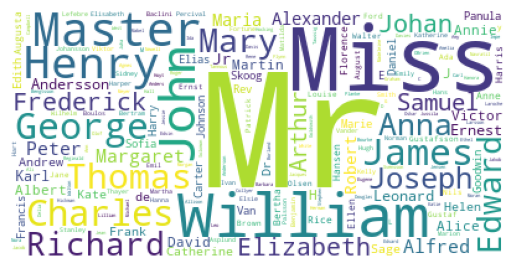

In [25]:
word_cloud = WordCloud(
    collocations = False, 
    background_color = 'white'
).generate(text)
plt.axis('off')
plt.imshow(word_cloud)

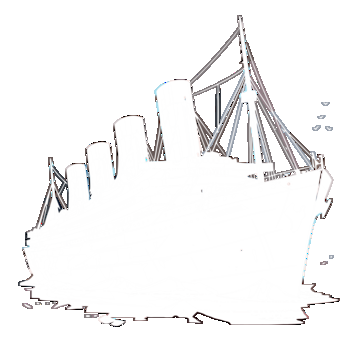

In [26]:
meta_mask = np.array(Image.open('../data/titanic.png'))
Image.fromarray(255 - meta_mask)

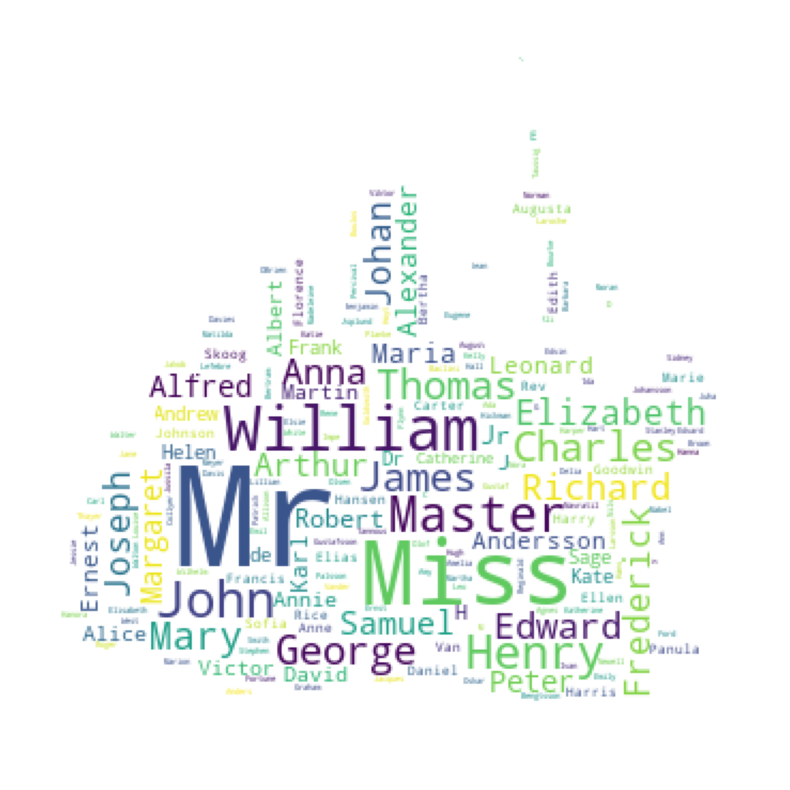

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
word_cloud = WordCloud(
    collocations = False, 
    background_color = 'white',
    contour_color = 'white',
    contour_width = 2,
    mask = 255 - meta_mask
).generate_from_text(text)
plt.axis('off')
plt.imshow(word_cloud)

#### 3.2 GeoSpatial

In [28]:
data = gpd.read_file("../data/dki_jakarta.geojson")
print(type(data))

<class 'geopandas.geodataframe.GeoDataFrame'>


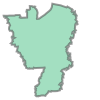

In [29]:
data.iloc[0]['geometry']

In [30]:
tmp = {
    'Kota Jakarta Selatan' : [2235606],
    'Kota Jakarta Barat' : [2470054],
    'Kota Jakarta Utara' : [1808985],
    'Kota Jakarta Timur' : [3079618],
    'Kota Jakarta Pusat' : [1049314],
}
data_penduduk = pd.DataFrame(tmp).transpose()
data_penduduk.reset_index(inplace=True)
data_penduduk.columns = ['name', 'jumlah_penduduk']
data = data.merge(data_penduduk, on='name', how='left')

data['coords'] = data['geometry'].apply(lambda x: x.centroid.coords[:])
data['coords'] = [coords[0] for coords in data['coords']]

In [31]:
data

,name,geometry,jumlah_penduduk,coords
0,Kota Jakarta Selatan,"POLYGON ((106.73745 -6.22378, 106.74461 -6.223...",2235606,"(106.81011348611611, -6.272709585652384)"
1,Kota Jakarta Barat,"POLYGON ((106.71413 -6.09616, 106.71254 -6.096...",2470054,"(106.7479587248978, -6.16515766228867)"
2,Kota Jakarta Utara,"POLYGON ((106.71413 -6.09616, 106.71509 -6.095...",1808985,"(106.87001899313334, -6.129493841890698)"
3,Kota Jakarta Timur,"POLYGON ((106.83972 -6.33514, 106.84013 -6.332...",3079618,"(106.90052862556927, -6.255705513696731)"
4,Kota Jakarta Pusat,"POLYGON ((106.79239 -6.20778, 106.79616 -6.207...",1049314,"(106.8351378708576, -6.181189478255109)"


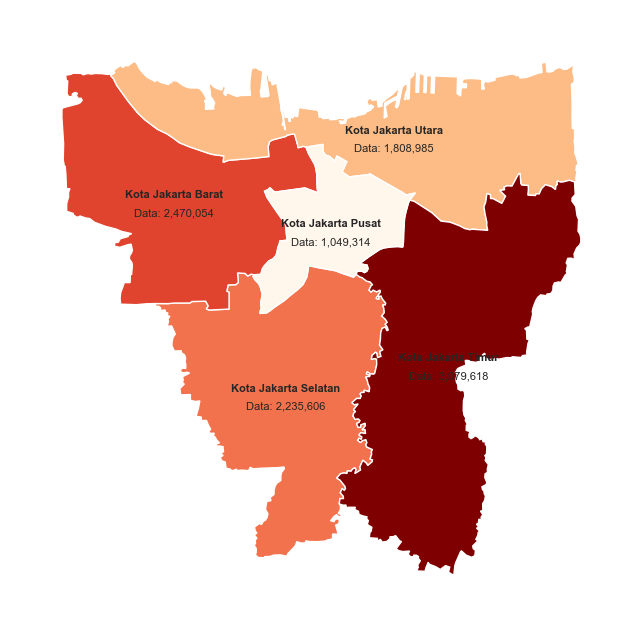

In [32]:
gplt.choropleth(
    data, 
    hue=data['jumlah_penduduk'], 
    cmap = 'OrRd', 
    figsize = (12,8))

for _, row in data.iterrows():
    hue = row['jumlah_penduduk']
    plt.text(s=row['name'], x = row['coords'][0], y = row['coords'][1],
           horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8})
    plt.text(s='Data: ' + f'{hue:,}', x=row['coords'][0],y = row['coords'][1] - 0.01 ,
          horizontalalignment='center', fontdict = {'size': 8})